In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

#Loading the dataset
rawdata = pd.read_csv('/content/gdrive/My Drive/project/recipes.csv',encoding='ISO-8859-1')

#Print the first 5 rows of the dataframe.
rawdata.head()
print(rawdata.head())

df = rawdata.drop(["name","id","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)

#print(df)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)
#print(X_std)
pca2 = PCA(n_components='mle')
pca2.fit(X_std)
print(pca2.explained_variance_ratio_)
print(pca2.explained_variance_)
print(pca2.n_components_)
print(pca2.mean_,pca2.noise_variance_)

#we try to compare accuracy with different n_components, we use mle algorithm
#and find that n_componment will be 6 and accuracy is the best. However
#if we want to diversion reduction, we choose n_components = 3, the accuracy is better and suitable for our aims.

#besides, according to the sum of the pca.explained_variance_ratio below,
#when n_components = 3, the sum over 60%.

retained = 3
pca = PCA(n_components=retained)
pc_scores = pca.fit_transform(X_std) 
#print(pca.inverse_transform(pc_scores))

PCs=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8',]
diabetes_data = pd.DataFrame(pc_scores,columns=PCs[:retained]) 
diabetes_data['calories'] = rawdata['calories']
#scores_matrix.to_csv("Diabetes_PCs.csv")


                      name      id  ...  stated_fat  total_carbonhydrate
0    apple cider reduction  521756  ...           0                    1
1    baked corn on the cob  434212  ...           1                    8
2          chocolate  dirt  425260  ...          37                    8
3            clotted cream    9043  ...         137                    1
4  easter hard boiled eggs  354371  ...           7                    0

[5 rows x 19 columns]
[0.34339382 0.18601525 0.12073548 0.10080723 0.09761246 0.07756731
 0.05787898 0.01502736 0.00085674]
[3.43397257 1.86017111 1.20736683 1.00808238 0.97613436 0.77568087
 0.57879558 0.15027509 0.00856745]
9
[-3.33958425e-18  3.29695126e-17 -3.54706481e-16 -8.59765308e-18
 -9.23714794e-18 -5.68439873e-19 -3.97907911e-18  9.66347784e-18
  1.91848457e-17 -7.30089962e-18] 0.0010537698761347524


In [4]:
pc_scores.shape

(99999, 3)

In [5]:
features = list(df.columns.values)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3'], index=features)
loadings 

#PC1: Glucose, skin thickness, and insulin closely affect BMI index 
#PC2: As people get older, the number of pregnancy increases
#PC3: The higher the glucose, the lower the blood pressure, or a negative correlation between them.

,PC1,PC2,PC3
minutes,0.004424,0.013301,0.009093
n_steps,0.037896,-0.101569,-0.692353
n_ingredients,0.029356,-0.103258,-0.698428
calories,0.523732,0.158956,0.008355
total_fat,0.319349,-0.513478,0.126356
sugars,0.445883,0.406337,-0.024928
sodium,0.106880,-0.094321,-0.000820
protein,0.327029,-0.296700,-0.024954
stated_fat,0.311114,-0.525969,0.119473
total_carbonhydrate,0.455442,0.388892,-0.034767


In [6]:
## observing the shape of the data
diabetes_data.shape

(99999, 4)

In [7]:
X = rawdata.drop(["name","id","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)
y = rawdata.calories

In [8]:
X

,minutes,n_steps,n_ingredients,calories,total_fat,sugars,sodium,protein,stated_fat,total_carbonhydrate
0,155,13,1,14.4,0,0,8,0,0,1
1,35,2,1,113.3,2,21,0,8,1,8
2,5,3,1,201.2,19,91,0,3,37,8
3,900,6,1,410.6,67,0,1,4,137,1
4,12,9,1,68.9,7,0,2,12,7,0
...,...,...,...,...,...,...,...,...,...,...
99994,15,5,8,289.3,24,2,15,57,46,1
99995,30,10,8,265.0,21,22,8,7,43,10
99996,40,17,8,191.9,10,60,3,5,19,10
99997,40,6,8,393.7,15,6,37,58,25,14


In [9]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [10]:
X_train.shape

(66666, 10)

In [11]:
X_test.shape

(33333, 10)

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

# LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1).fit(X_train, y_train.astype('int'))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train.astype('int'))))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test.astype('int'))))

Training set score: 0.007
Test set score: 0.005


In [14]:
logreg.intercept_.T

array([ 1.82101814,  1.9879846 ,  1.9732628 , ..., -3.01542348,
       -8.28583547, -2.51949177])

In [15]:
logreg.coef_.T

array([[ 0.20156526, -0.05049769,  0.32549783, ...,  0.0085073 ,
         0.00281564,  0.01116717],
       [-0.01648209, -0.538636  , -0.26097974, ...,  0.01260963,
        -0.11807294, -0.03375247],
       [-0.93885521, -0.4891453 , -0.67928485, ..., -0.00301177,
        -0.09925436, -0.05712453],
       ...,
       [-1.47577976, -1.30282363, -1.23279166, ...,  0.15326097,
         0.56014346, -0.06107012],
       [-1.23240365, -1.09390794, -1.04748489, ...,  0.07197677,
         0.01263999,  0.10432686],
       [-1.66022469, -1.42234825, -1.34809089, ...,  0.42132187,
         0.20516308, -0.09553095]])

### Confusion Matrix

In [17]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test.astype('int'), y_pred))  
print(classification_report(y_test.astype('int'), y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[32  0  0 ...  0  0  0]
 [ 6  0  0 ...  0  0  0]
 [ 9  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]]
              precision    recall  f1-score   support

           0       0.02      0.51      0.03        63
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        27
          11       0.00      0.00      0.00        36
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        29
          14       0.00      0.00

### ROC

In [18]:
from sklearn import metrics


print("Accuracy=", metrics.accuracy_score(y_test.astype('int'), y_pred))
 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.astype('int'),  y_pred_proba)
auc = metrics.roc_auc_score(y_test.astype('int'), y_pred_proba)

plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

Accuracy= 0.004890048900489005


ValueError: ignored

### Gains / Lift Chart

In [ ]:

#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

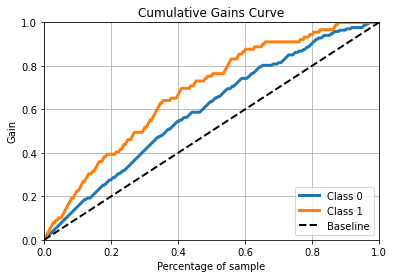

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

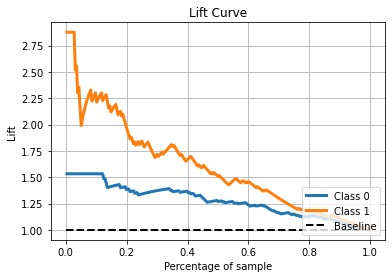

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()

# K-NN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.astype('int'))
    
    train_scores.append(knn.score(X_train,y_train.astype('int')))
    test_scores.append(knn.score(X_test,y_test.astype('int')))

In [33]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [34]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 2.217022170221702 % and k = [1]


### K-NN Result Visualisation

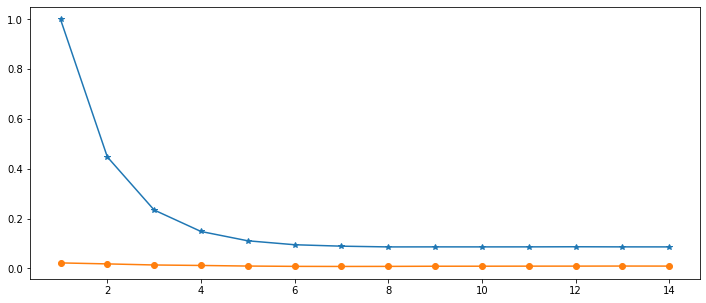

In [35]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

This one compares...

#### The best result is captured at k = 11 hence 11 is used for the final model

In [37]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train.astype('int'))
knn.score(X_test,y_test.astype('int'))

0.00915009150091501

## Model Performance Analysis

In [38]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test.astype('int'), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4667,4672,4675,4712,4718,4730,4768,4780,4797,4832,4859,4915,4954,5098,5168,5182,5195,5251,5257,5272,5290,5331,5356,5487,6039,6295,6357,6440,6694,6709,6759,6953,6966,7089,7167,7371,7737,8548,8908,All
True,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22,8,10,0,3,5,0,1,0,2,0,3,0,0,0,1,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63
1,12,8,9,1,1,3,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41
2,7,4,7,4,1,3,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
3,9,5,10,2,1,2,2,0,0,3,0,5,0,0,0,0,0,1,0,0,3,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47
4,7,6,4,5,1,3,2,1,0,3,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
25712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       167
           1       0.61      0.55      0.58        89

    accuracy                           0.72       256
   macro avg       0.69      0.68      0.69       256
weighted avg       0.72      0.72      0.72       256



In [ ]:
####before processing data in PCA, we got 0.76 accurancy in Knn, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

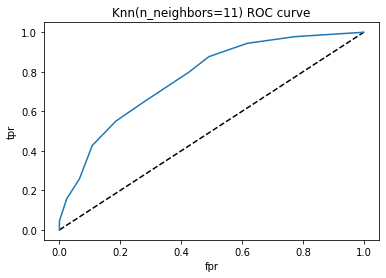

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7694274372603109

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7500666285931848
Best Parameters: {'n_neighbors': 11}


# Naiive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

In [24]:
# Training your model 
mod.fit(X_train, y_train.astype('int'))

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [27]:
mod.score(X_test,y_test.astype('int'))

0.7875378753787537

In [30]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test.astype('int'), y_pred))  
print(classification_report(y_test.astype('int'), y_pred)) 

[[48 15  0 ...  0  0  0]
 [ 2 33  5 ...  0  0  0]
 [ 1 16 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        63
           1       0.52      0.80      0.63        41
           2       0.69      0.50      0.58        36
           3       0.73      0.94      0.82        47
           4       0.50      0.03      0.05        37
           5       0.42      0.93      0.58        27
           6       0.28      0.41      0.33        22
           7       1.00      0.19      0.31        27
           8       0.83      0.93      0.88        27
           9       0.71      0.77      0.74        26
          10       0.72      0.48      0.58        27
          11       0.73      0.89      0.80        36
          12       1.00      0.52      0.69        21
          13       0.73      0.83      0.77        29
          14       0.72      0.68

In [ ]:
##before processing data in PCA, we got 0.74 accurancy in Naiive Bayes, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA#